# MC

## 蒙特卡罗方法

蒙特卡罗方法是一种统计模拟方法，由冯·诺依曼和乌拉姆提出，在大量的随机数下，根据概率估计结果，随机数据越多，获得的结果越精确。下面我们将用python实现蒙特卡罗方法。

**工作步骤**

- 构造或描述概率过程
- 实现从已知概率分布抽样
- 建立各种估计量

### 蒙特卡洛方法求圆周率

基本思想：在图中区域产生足够多的随机数点，然后计算落在圆内 的点的个数与总个数的比值再乘以4，就是圆周率。

<img src="../images/iShot2021-09-03 14.52.41.png"/>

In [28]:
import math
import time
import random
import numpy as np
import matplotlib.pyplot as plt

In [29]:
M = 10000000  #输入的数一般要很大才能保证所求结果不会与圆周率产生较大误差
N = 0  #累计落在园内的随机点的个数，初始值为零

for i in range(int(M)):
    # random.random()生成数范围：0-1
    x = random.random()  #利用random（）产生随机数或者是伪随机数
    y = random.random()
    if math.sqrt(x ** 2 + y ** 2) < 1:  #判断产生的随机点是否落在单位圆内
        N = N + 1  #对落在圆内的点进行累加

pi = 4 * N / int(M)

print(pi)

3.1405996


### 蒙特卡罗方法求定积分面积

求x∈[0,1], y=x²的面积

<img src="../images/iShot2021-09-03 15.13.47.png"/>

<img src="../images/iShot2021-09-03 15.14.38.png"/>

In [30]:
n = 100000  #要确保输入的整数足够大
m = 0

import random

for i in range(n):
    '''
    random.uniform(a, b)  随机在[a,b]之间产生浮点数
    random.randint(a, b)  随机在[a,b]之间产生整数
    '''
    x = random.uniform(0, 1)
    y = random.random()
    if x ** 2 > y:  #表示该点位于曲线y=x^2的下面
        m = m + 1

R = m / n

print(R)

0.33276


现在有个项目，共三个WBS要素，分别是设计、建造和测 试。假设这三个WBS要素预估工期的概率分布呈标准正态分布， 且三者之间都是完成到开始的逻辑关系，于是整个项目工期就 是三个WBS要素工期之和。

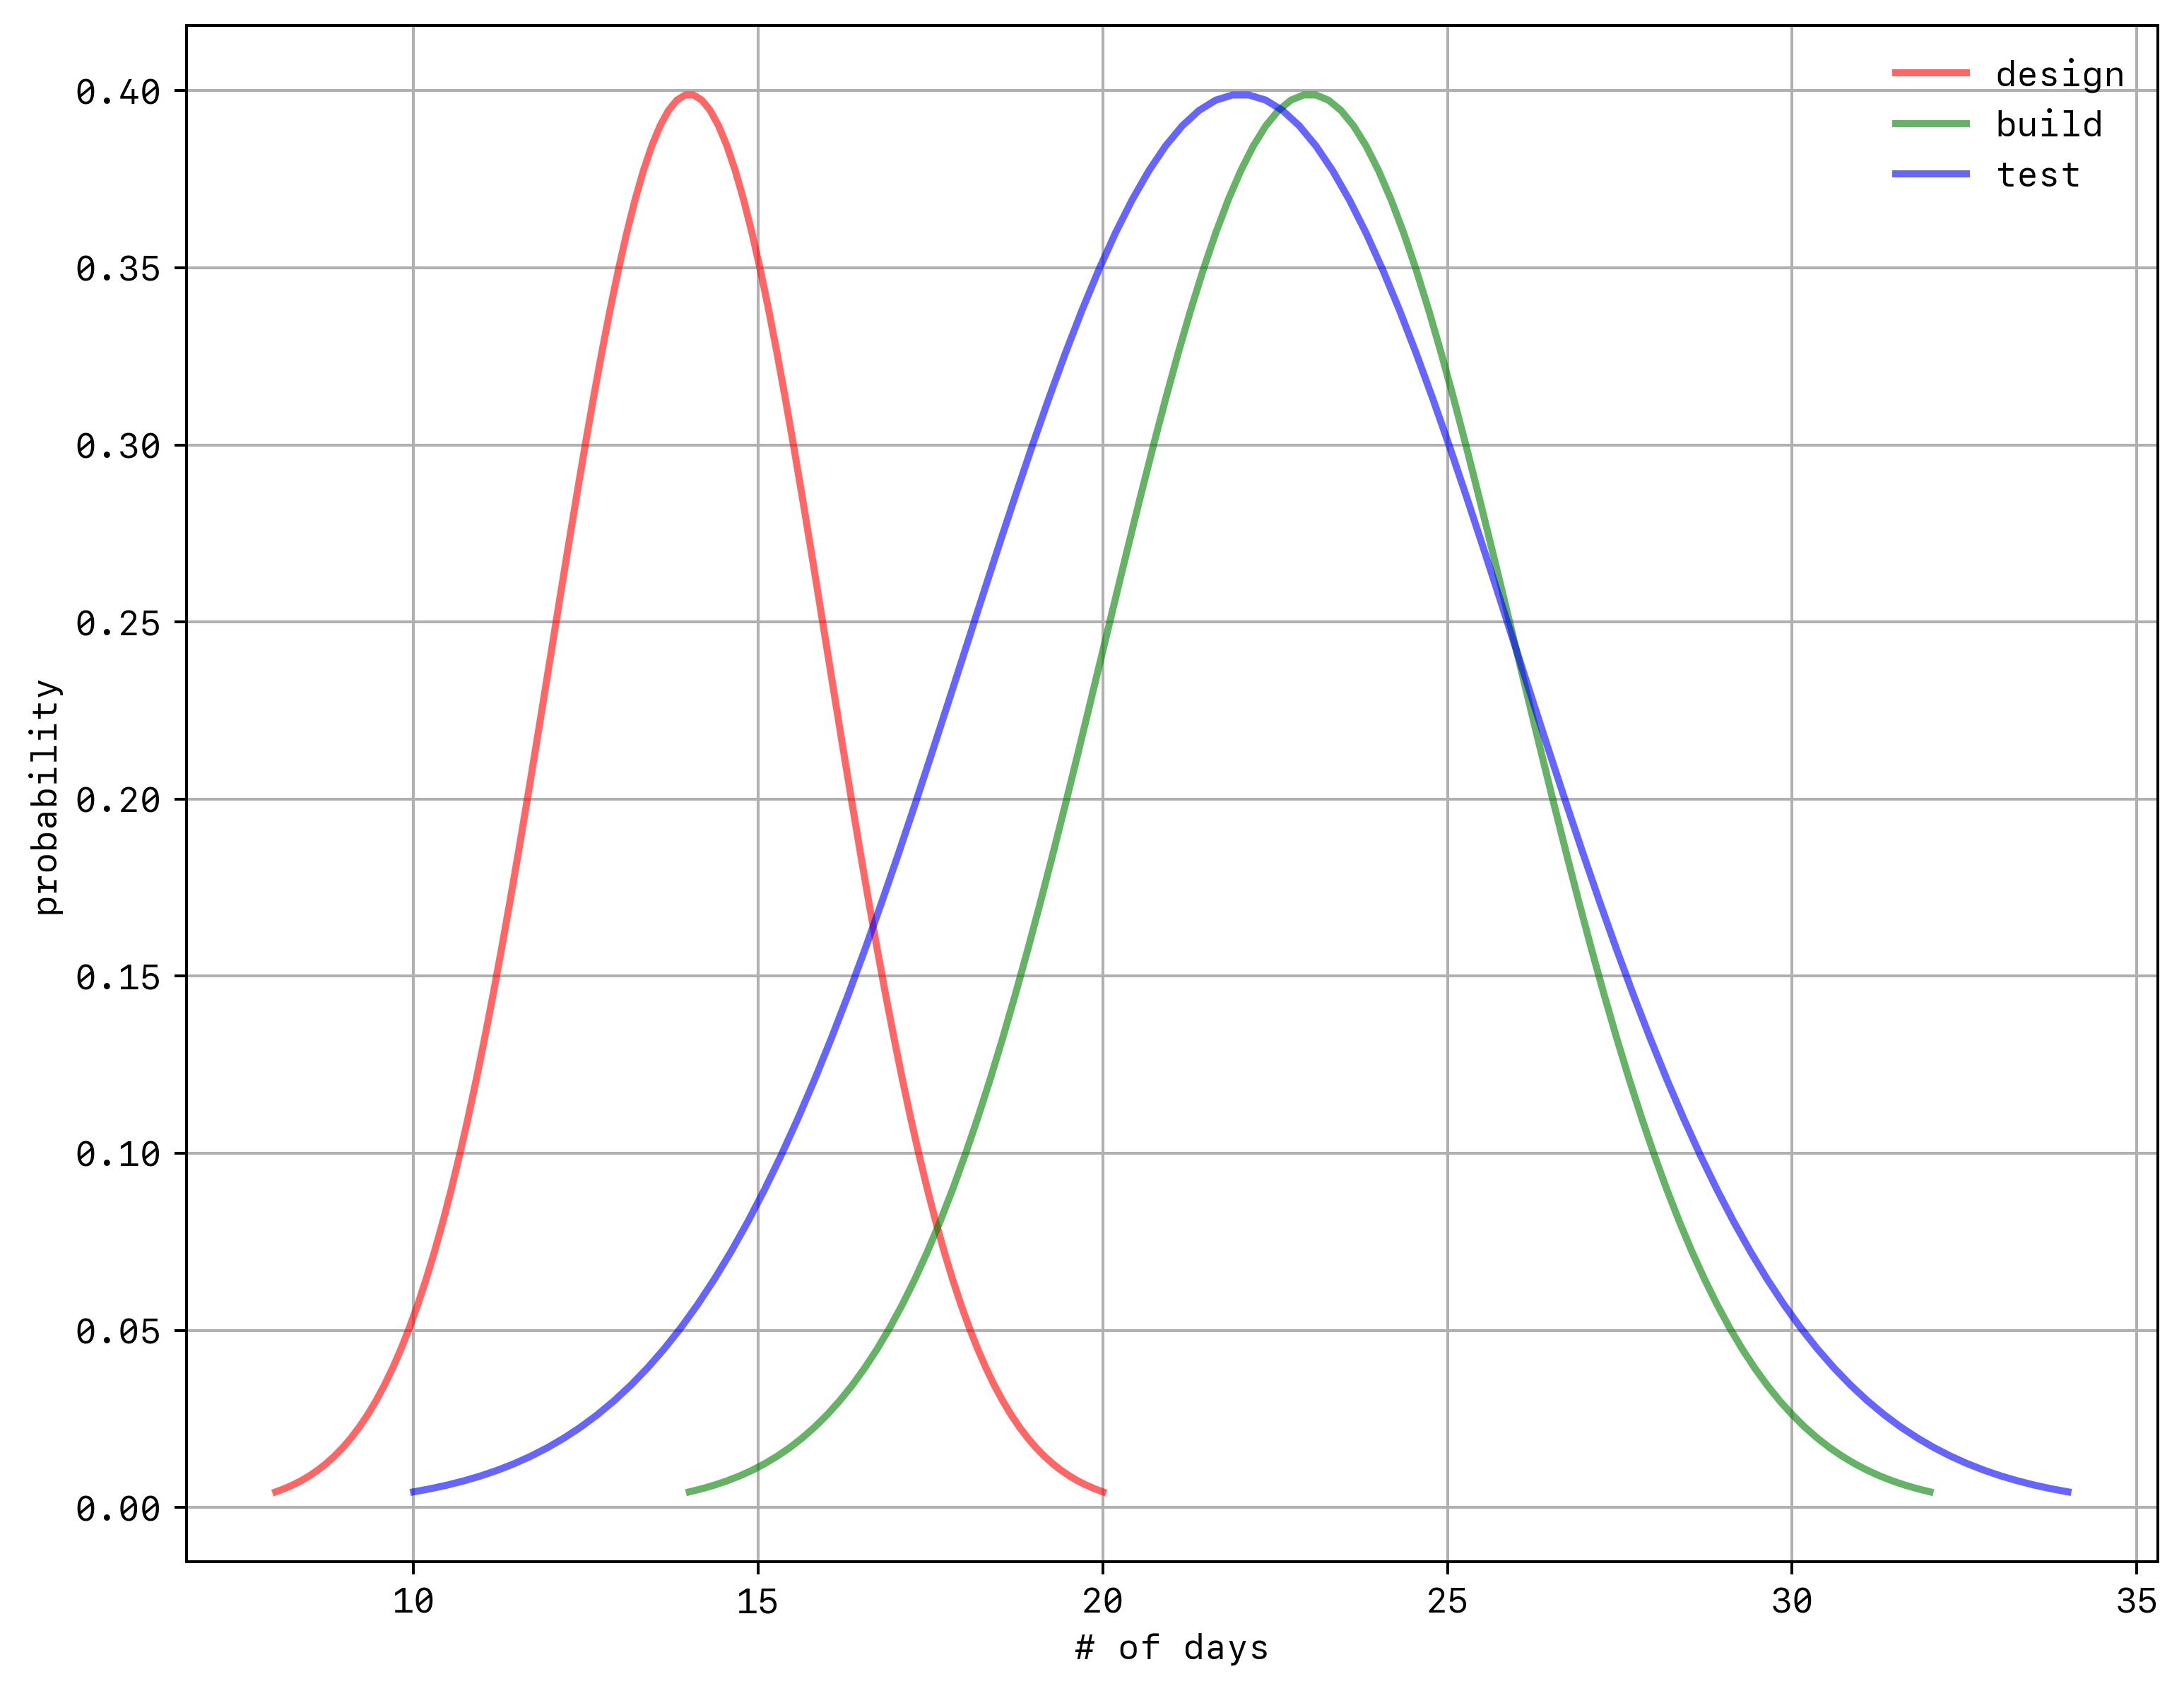

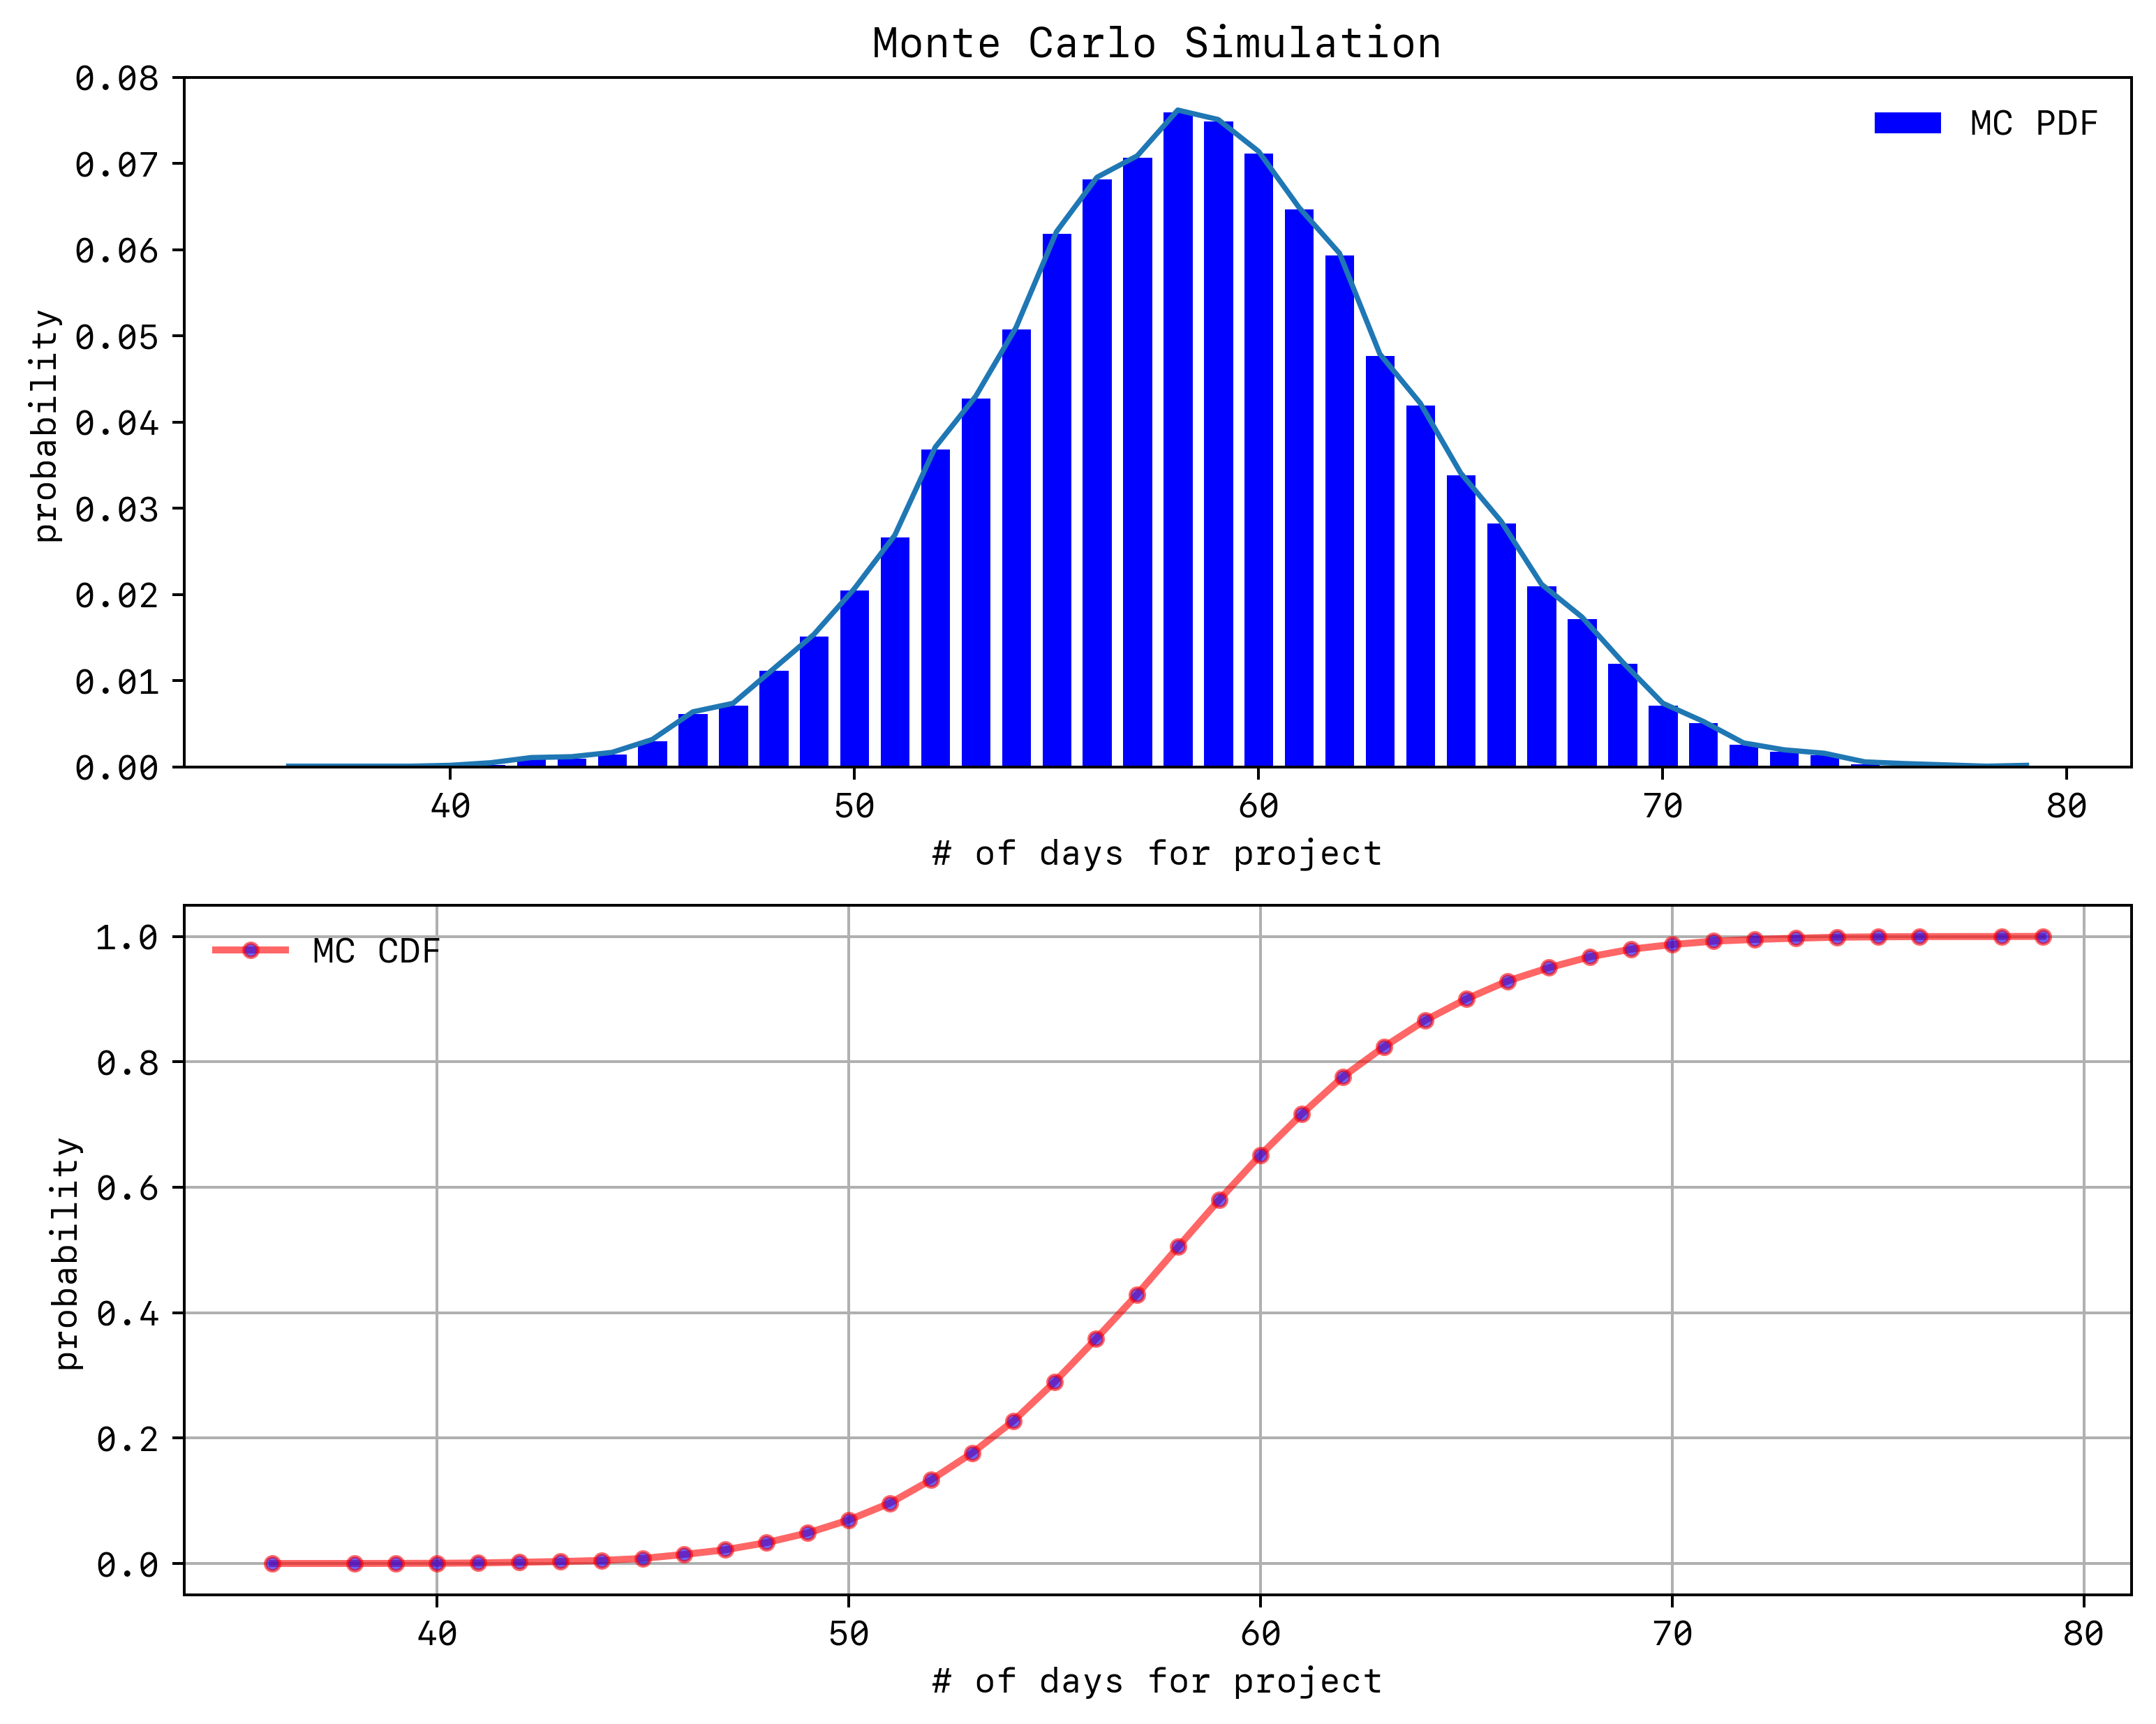

In [31]:
plt.rcParams['font.sans-serif'] = ['SF Mono']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 360  #图片像素
plt.rcParams['figure.dpi'] = 360  #分辨率

mu = [14, 23, 22]
sigma = [2, 3, 4]
tips = ['design', 'build', 'test']
figureIndex = 0
fig = plt.figure(figureIndex, figsize=(10, 8))
color = ['r', 'g', 'b']
ax = fig.add_subplot(111)

for i in range(3):
    x = np.linspace(mu[i] - 3 * sigma[i], mu[i] + 3 * sigma[i], 100)
    y_sig = np.exp(-(x - mu[i]) ** 2 / (2 * sigma[i] ** 2)) / (math.sqrt(2 * math.pi))
    ax.plot(x, y_sig, color[i] + '-', linewidth=2, alpha=0.6, label=tips[i])
ax.legend(loc='best', frameon=False)
ax.set_xlabel('# of days')
ax.set_ylabel('probability')
plt.grid(True)
size = 10000  # 蒙特卡洛采样 三个WBS要素
samples = [np.random.normal(mu[i], sigma[i], size) for i in range(3)]
data = np.zeros(len(samples[1]))  # 计算工期

for i in range(len(samples[1])):
    for j in range(3):
        data[i] += samples[j][i]
    data[i] = int(data[i])


def count(lis):  # 统计一个列表中每个元素出现的次数
    lis = np.array(lis)
    key = np.unique(lis)
    x = []
    y = []
    for k in key:
        mask = (lis == k)
        list_new = lis[mask]
        v = list_new.size
        x.append(k)
        y.append(v)
    return x, y


a, b = count(data)  # 计算工期出现概率与累计概率
pdf = [x / size for x in b]
cdf = np.zeros(len(a))

for i in range(len(a)):
    if i > 0:
        cdf[i] += cdf[i - 1]
    cdf[i] += b[i]
cdf = cdf / size
figureIndex += 1
fig = plt.figure(figureIndex, figsize=(10, 8))
ax = fig.add_subplot(211)
ax.bar(a, height=pdf, color='blue', edgecolor='white', label='MC PDF')
ax.plot(a, pdf)
ax.legend(loc='best', frameon=False)
ax.set_xlabel('# of days for project')
ax.set_ylabel('probability')
ax.set_title('Monte Carlo Simulation')
ax = fig.add_subplot(212)
ax.plot(a, cdf, 'r-', marker='o', mfc='b', ms=4, lw=2, alpha=0.6, label='MC CDF')
ax.legend(loc='best', frameon=False)
ax.set_xlabel('# of days for project')
ax.set_ylabel('probability')
ax.grid(True)
plt.show()

### 三门问题

参赛者会看见三扇关闭了的门，其中一扇的后面有一辆汽车，选中后面有车的那扇门可赢得该汽车，另外两扇门后面则各藏有一只山羊。当参赛者选定了一扇门，但未去开启它的时候，节目主持人开启剩下两扇门的其中一扇，露出其中一只山羊。主持人其后会问参赛者要不要换另一扇仍然关上的门。问题是：换另一扇门会否增加参赛者赢得汽车的机率？如果严格按照上述的条件，即主持人清楚地知道，自己打开的那扇门后是羊，那么答案是会。不换门的话，赢得汽车的几率是1/3。换门的话，赢得汽车的几率是2/3。

* 现在有三扇门，只有一扇门有汽车，其余两扇门的都是山羊。
* 汽车事前是等可能地被放置于三扇门的其中一扇后面。
* 参赛者在三扇门中挑选一扇。他在挑选前并不知道任意一扇门后面是什麽。
* 主持人知道每扇门后面有什么。
* 如果参赛者挑了一扇有山羊的门，主持人必须挑另一扇有山羊的门。
* 如果参赛者挑了一扇有汽车的门，主持人等可能地在另外两扇有山羊的门中挑一扇门。
* 参赛者会被问是否保持他的原来选择，还是转而选择剩下的那一扇门.

In [32]:
def three_door_question(times: int):
    import random
    result_if_not_change = 0
    result_if_change = 0
    for i in range(0, times):
        doors = [1, 2, 3]  # 3是大奖
        random.shuffle(doors)
        first_choice = doors[random.randint(0, 2)]
        doors.remove(first_choice)
        # 如果大奖在剩下的里面，由主持人排除一个错误答案，剩下大奖
        if 3 in doors:
            doors = [3]
        # 如果大奖已经被选了，主持人随机排除剩下一个错误答案
        else:
            doors.remove(random.choice((1, 2)))
        if first_choice == 3:
            result_if_not_change = result_if_not_change + 1
        if doors[0] == 3:
            result_if_change = result_if_change + 1

    print(
        f'Total times:{times}, prob of not change is {result_if_not_change / times}, prob of change is {result_if_change / times}')


three_door_question(10000)
three_door_question(100000)
three_door_question(1000000)

Total times:10000, prob of not change is 0.3359, prob of change is 0.6641
Total times:100000, prob of not change is 0.33203, prob of change is 0.66797
Total times:1000000, prob of not change is 0.333589, prob of change is 0.666411


### M&M豆问题

M&M豆是有各种颜色的糖果巧克力豆。制造M&M豆的Mars公司会不时变更不同颜色巧克力豆之间的混合比例。

1995年，他们推出了蓝色的M&M豆。在此前一袋普通的M＆M豆中，颜色的搭配为：30%褐色，20%黄色，20%红色，10%绿色，10%橙色，10%黄褐色。这之后变成了：24%蓝色，20%绿色，16%橙色，14%黄色，13%红色，13%褐色。

假设我的一个朋友有两袋M&M豆，他告诉我一袋是1994年，一袋是1996年。

但他没告诉我具体哪个袋子是哪一年的，他从每个袋子里各取了一个M&M豆给我。一个是黄色，一个是绿色的。那么黄色豆来自1994年的袋子的概率是多少？

In [35]:
###MM的计算机解决方法
for i in range(10):
    print(time.strftime("%Y-%m-%d %X", time.localtime()))
    dou = {1994: {'褐色': 30, '黄色': 20, '红色': 20, '绿色': 10, '橙色': 10, '黄褐': 10},
           1996: {'蓝色': 24, '绿色': 20, '橙色': 16, '黄色': 14, '红色': 13, '褐色': 13}}
    num = 10000
    #模拟抽取100万次，形成新的字典，键值1994,1996
    list_1994 = ['褐色'] * 30 * num + ['黄色'] * 20 * num + ['红色'] * 20 * num + ['绿色'] * 10 * num + ['橙色'] * 10 * num + [
        '黄褐'] * 10 * num
    list_1996 = ['蓝色'] * 24 * num + ['绿色'] * 20 * num + ['橙色'] * 16 * num + ['黄色'] * 14 * num + ['红色'] * 13 * num + [
        '褐色'] * 13 * num
    #对列表随机排序
    random.shuffle(list_1994)
    random.shuffle(list_1996)
    #遍历所有元素
    count_all = 0
    count_key = 0
    for key in range(100 * num):
        if list_1994[key] == '黄色' and list_1996[key] == '绿色':
            count_all += 1
            count_key += 1
        if list_1994[key] == '绿色' and list_1996[key] == '黄色':
            count_all += 1
    print(count_key / count_all, 20 / 27)
    print(time.strftime("%Y-%m-%d %X", time.localtime()))

2021-09-03 15:59:15
0.7392388233338874 0.7407407407407407
2021-09-03 15:59:18
2021-09-03 15:59:18
0.7426097894853676 0.7407407407407407
2021-09-03 15:59:21
2021-09-03 15:59:21
0.7426000036884717 0.7407407407407407
2021-09-03 15:59:24
2021-09-03 15:59:24
0.7388489879675404 0.7407407407407407
2021-09-03 15:59:26
2021-09-03 15:59:26
0.7407545620778445 0.7407407407407407
2021-09-03 15:59:29
2021-09-03 15:59:29
0.7384025630104262 0.7407407407407407
2021-09-03 15:59:33
2021-09-03 15:59:33
0.7411114183024606 0.7407407407407407
2021-09-03 15:59:37
2021-09-03 15:59:37
0.7411732050333086 0.7407407407407407
2021-09-03 15:59:39
2021-09-03 15:59:39
0.7431118014719479 0.7407407407407407
2021-09-03 15:59:43
2021-09-03 15:59:43
0.7400066745772768 0.7407407407407407
2021-09-03 15:59:46
